## Machine Learning Pipeline:

- Define Problem
    - ML type of problem

- Prepare Data
    - Data Visualization methos ...
    - Data Selection
    - Feature Selection methods ..
    - Feature Engineering methods ..
    - Data Transormation methods ..

- Improve Results 
    - Algorithms Turning methids
    - ensemble methods

- Present Results
    - Save the model

# Define Problem:
## Pima Indians Diabetes Database 
### Predict the onset of diabetes based on diagnostic measures

Dataset link: https://www.kaggle.com/uciml/pima-indians-diabetes-database

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Attribute Information:**

1. Number of times pregnant 

2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 

3. Diastolic blood pressure (mm Hg) 

4. Triceps skin fold thickness (mm) 

5. 2-Hour serum insulin (mu U/ml) 

6. Body mass index (weight in kg/(height in m)^2) 

7. Diabetes pedigree function 

8. Age (years) 

9. Class variable (0 or 1)

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

## 2. Data Preparing 

In [8]:
# Loading Data
df = pd.read_csv("E:\AI-Application-Implementation\Project\TechnoVedha\Diabete\diabetes.csv")
# Getting dataframe columns names
df_name=df.columns

## 2.1. Analyze Data:
### 2.1.1 Descriptive Statitics

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- The data is not included time or object
- There is no null value in data set

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 2.2. Data Visualization
let's take look at our data in the most raw shape.
I really recommend scatter plot because we can get the idea of our data without any manipulation

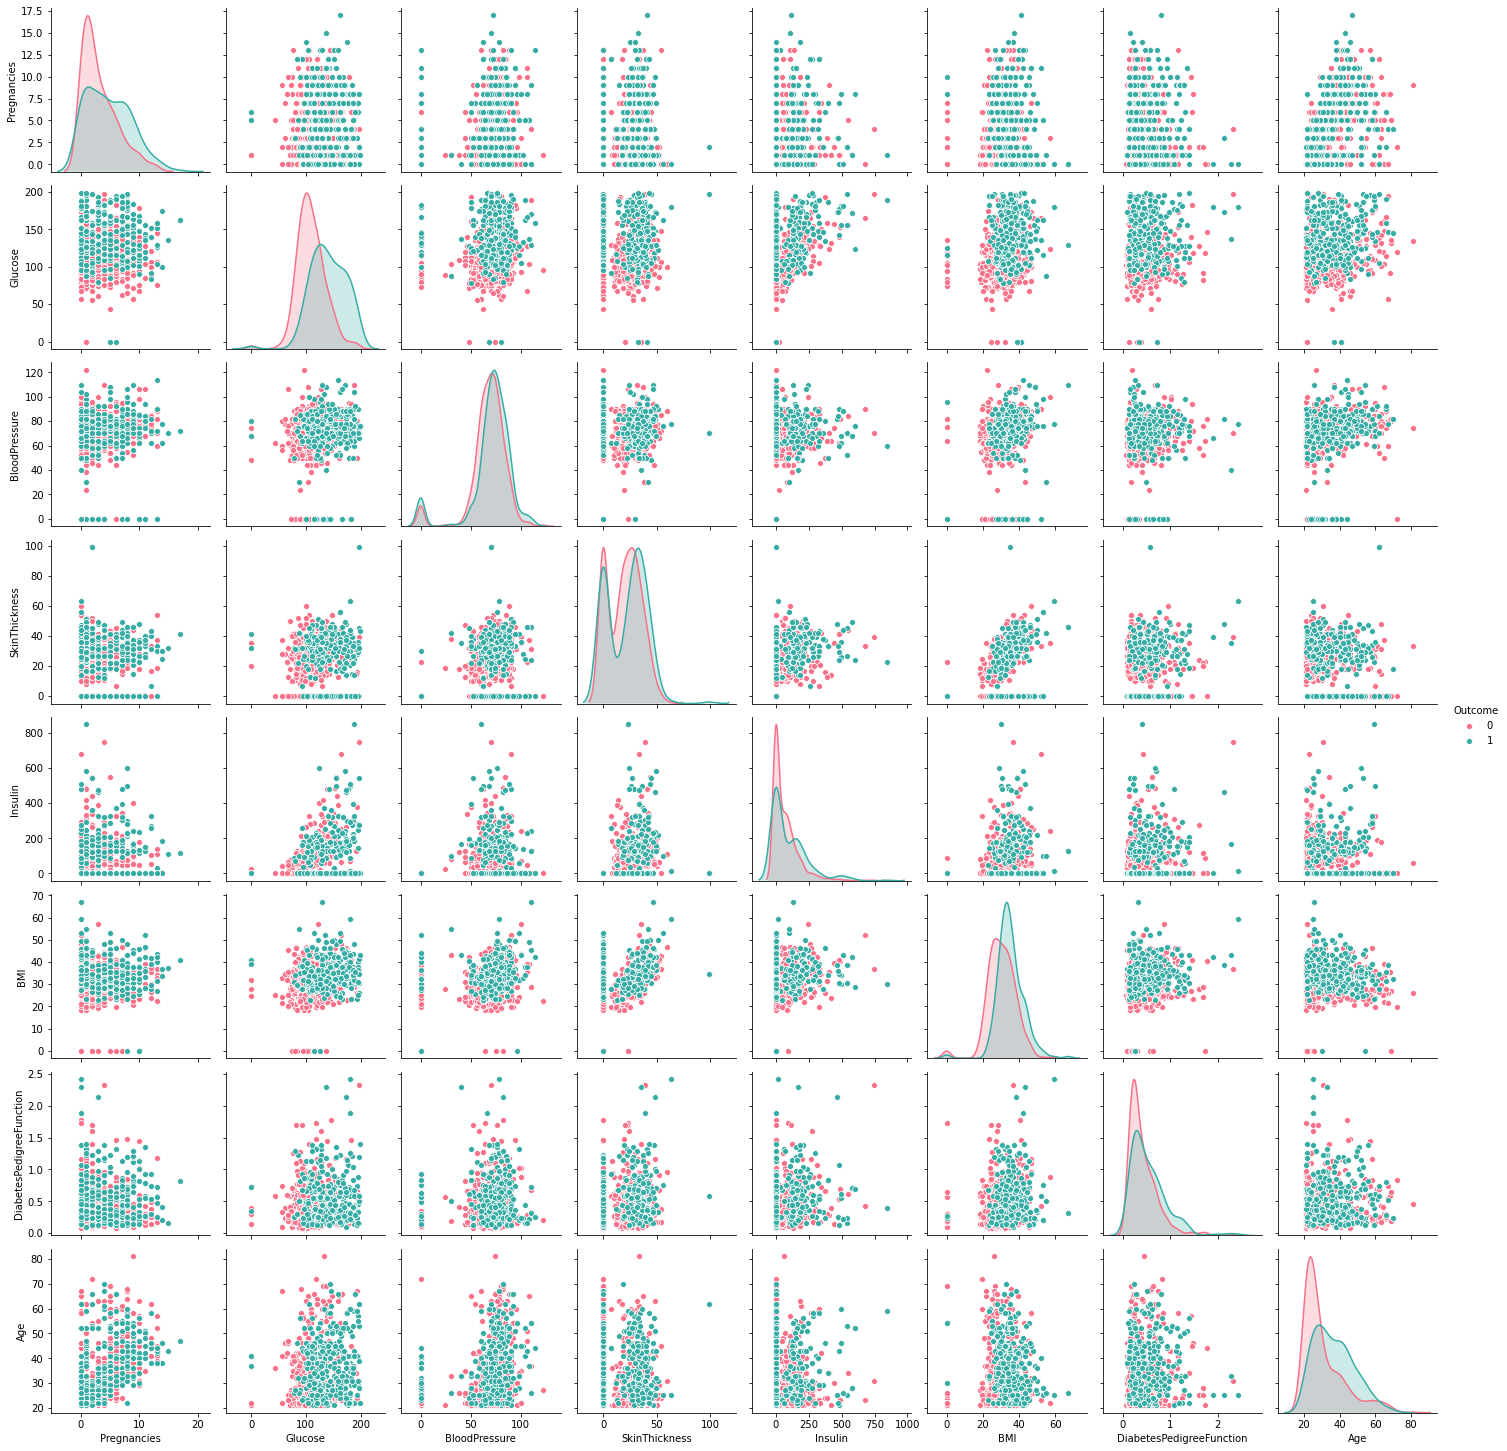

In [12]:
g = sb.pairplot(df, hue="Outcome", palette="husl")

It seems that the data suffer from outliers

Let's see for example pregnency distribution

In [13]:
import scipy.stats as stats
import pylab

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [14]:
def transformation(feature):
    print(feature,"Gaussian Distributed using Q-Q plot.")
    plot_data(df, feature)
    print("After Exponancial Transormation")
    #Exponancial transformation
    df[feature]=df[feature]**(1/1.2)
    plot_data(df,feature)

Pregnancies Gaussian Distributed using Q-Q plot.


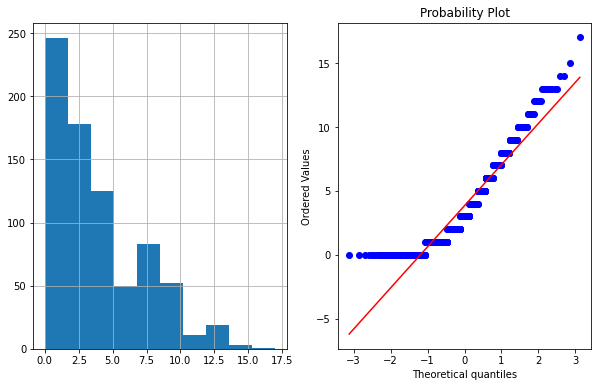

After Exponancial Transormation


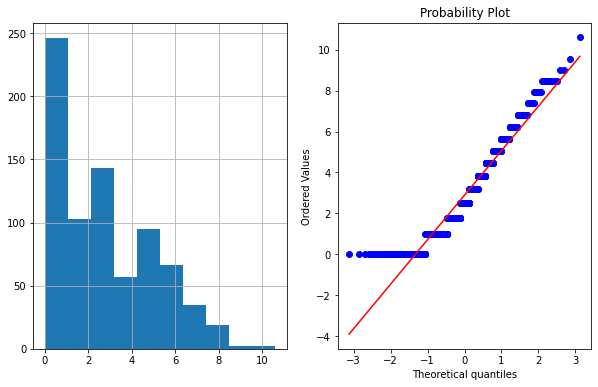

In [15]:
transformation("Pregnancies")

Glucose Gaussian Distributed using Q-Q plot.


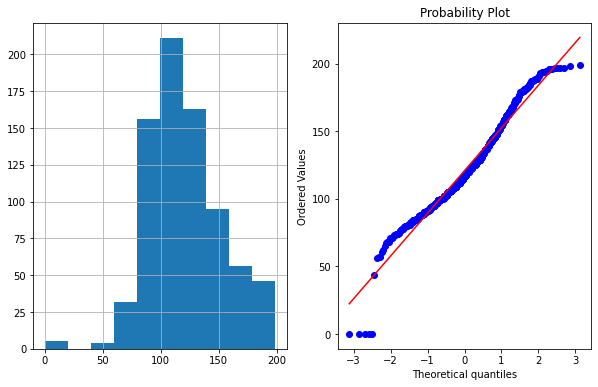

After Exponancial Transormation


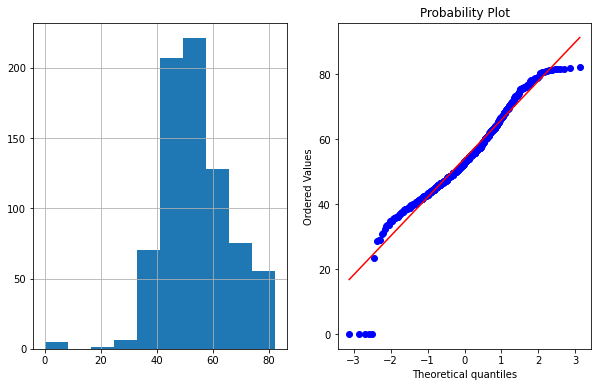

In [16]:
transformation("Glucose")

BMI Gaussian Distributed using Q-Q plot.


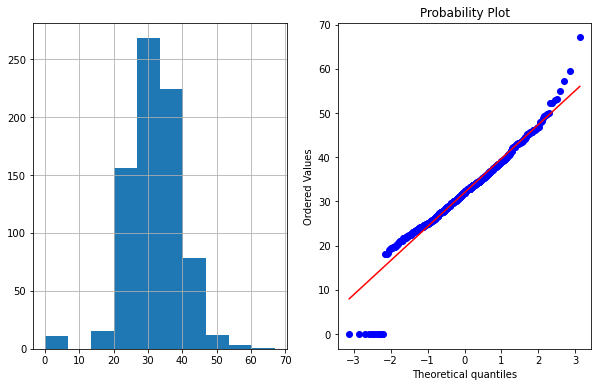

After Exponancial Transormation


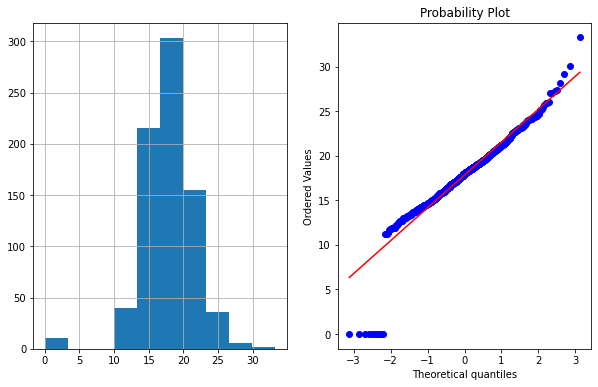

In [17]:
transformation("BMI")

In [18]:
def PlotPie(df, nameOfFeature):
    labels = [str(df[nameOfFeature].unique()[i]) for i in range(df[nameOfFeature].nunique())]
    values = [df[nameOfFeature].value_counts()[i] for i in range(df[nameOfFeature].nunique())]
    trace=go.Pie(labels=labels,values=values)
    py.iplot([trace])

In [19]:
PlotPie(df, 'Outcome')

In the case of classification problem we alwyas need to check the target distribution.
If the distribution of target is not balance, we must treat our data more carefully.
For example we can use several methods to resampling our data. We do not resampling our data in this kernel. In addition, we need to use stratified method in our validation in order to keep the same distribution in our train and test.   

In [20]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Let's see the outliers

In [21]:
def box_plot(df,features):
    sb.boxplot(x=df[features],orient="h")

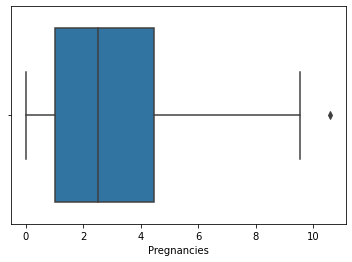

In [22]:
box_plot(df,df.columns[0])

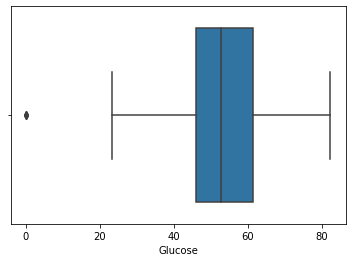

In [23]:
box_plot(df,df.columns[1])

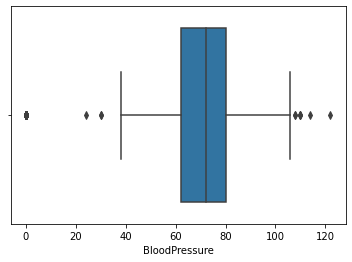

In [24]:
box_plot(df,df.columns[2])

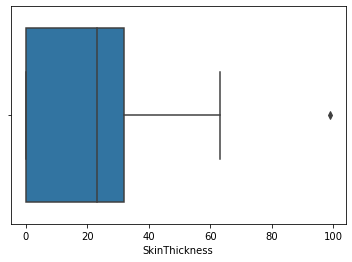

In [25]:
box_plot(df,df.columns[3])

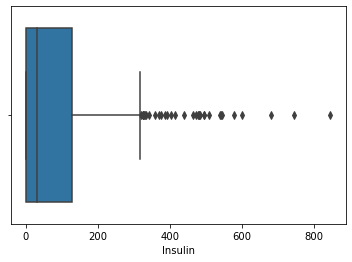

In [26]:
box_plot(df,df.columns[4])

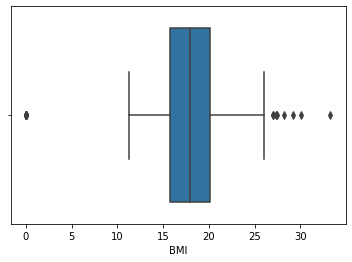

In [27]:
box_plot(df,df.columns[5])

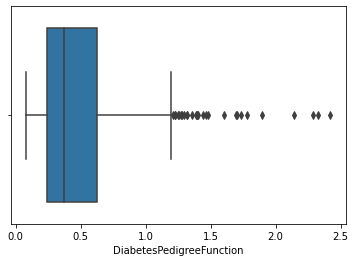

In [28]:
box_plot(df,df.columns[6])

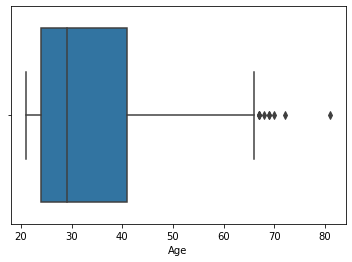

In [29]:
box_plot(df,df.columns[7])

### Treatment of outlilers
    a. Using IQR
    b. Z Score

#### a. Treatment using IQR

In [30]:
def remove_outlier(low = 25, high = 75):
    numerical_features = [i for i in df.columns if df[i].dtype != "O"]
    df1 = df.copy()
    for i in numerical_features:
        if len(df1[i].unique()) > 10:
            q1, q3 = np.percentile(df[i], [low,high]) #First quartile and third quartile
            iqr = q3-q1 #Interquartile range
            lower_bound, upper_bound  = q1-1.5*iqr, q3+1.5*iqr
            df1 = df1.loc[(df1[i] > lower_bound) & (df1[i] < upper_bound)]
    return df1

In [31]:
df_iqr=remove_outlier()

In [32]:
# Load libraries

from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

- We usually devide the data to train and test set. We will not touch test set until the end of the computation and the final perpormance evaluation. Then, we can devide the train set to train and validation sets. We use the validation data set to tune the model. 

- Traditional train test method suffer from high variance test problem. It means tha by changing the test set the result of the prediction changes. To over come this problem we use k-fold validation method in our train and validation set

let's make train-validation and test data sets.
- Note that stratify is used becasue we want to keep the train and test distribution 

## 4.3. Feature Selection


### 4.3.1. Corrolation

If we fit highly corrolated data in our model, it results in the overfitting probelm. Thus, for example if there are two highly corrolated features we have to drop the one that has more corrolation with other feature.  

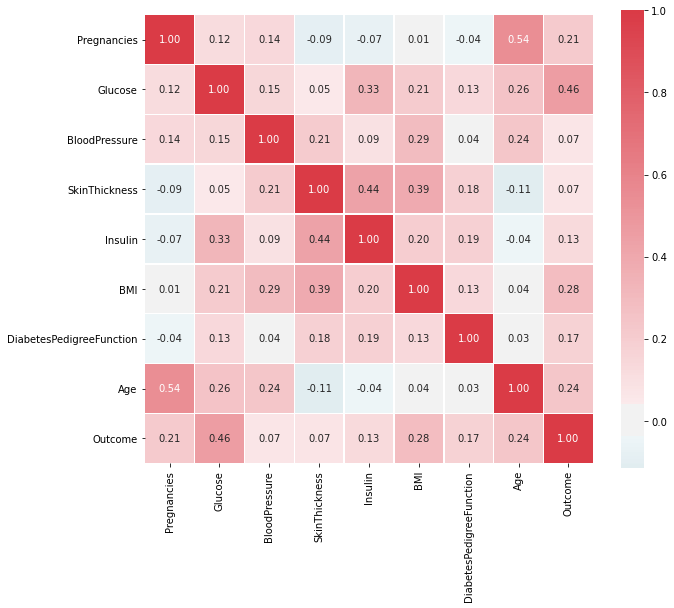

In [33]:
def HeatMap(df,x=True):
        correlations = df.corr()
        ## Create color map ranging between two colors
        cmap = sb.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sb.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()

HeatMap(df,x=True)

There is not highly corrolated feature in this data set.

## 4.3.2.Feature Importance
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome',axis=1), df['Outcome'])

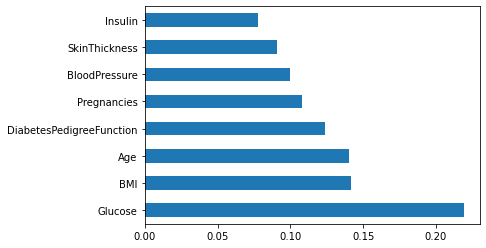

In [43]:
model=ExtraTreesClassifier()
model.fit(X_train, y_train)

feature_rank=pd.Series(model.feature_importances_,index=X_train.columns)
feature_rank.nlargest(len(X_train.columns)).plot(kind='barh')

In [44]:
df_unscaled = df[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
df_imp_scaled_name = df_unscaled.columns

In [45]:
df_imp_scaled = MinMaxScaler().fit_transform(df_unscaled)
X =  df_imp_scaled[:,0:4]
Y =  df_imp_scaled[:,4]
X_train_sc, X_test_sc, y_train_sc, y_test_sc =train_test_split(X,Y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                   stratify=df_imp_scaled[:,4])

 # Ensemble Methods

## 1 Voting Ensemble

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset.
A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

In [46]:
from sklearn.ensemble import VotingClassifier

In [47]:
param = {'C': 0.7678243129497218, 'penalty': 'l2'}
model1 = LogisticRegression(**param)

param = {'n_neighbors': 15}
model2 = KNeighborsClassifier(**param)

param = {'C': 1.7, 'kernel': 'linear'}
model3 = SVC(**param)

param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
model4 = DecisionTreeClassifier(**param)

param = {'learning_rate': 0.05, 'n_estimators': 150}
model5 = AdaBoostClassifier(**param)

param = {'learning_rate': 0.01, 'n_estimators': 100}
model6 = GradientBoostingClassifier(**param)

model7 = GaussianNB()

model8 = RandomForestClassifier()

model9 = ExtraTreesClassifier()

In [48]:
# create the sub models
estimators = [('LR',model1), ('KNN',model2), ('SVC',model3),
              ('DT',model4), ('ADa',model5), ('GB',model6),
              ('NB',model7), ('RF',model8),  ('ET',model9)]
    

In [49]:
# create the ensemble model
kfold = StratifiedKFold(n_splits=10)
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train_sc,y_train_sc, cv=kfold)
print('Accuracy on train: ',results.mean())
ensemble_model = ensemble.fit(X_train_sc,y_train_sc)
pred = ensemble_model.predict(X_test_sc)
print('Accuracy on test:' , (y_test_sc == pred).mean())

Accuracy on train:  0.7655486542443064
Accuracy on test: 0.8311688311688312


### Saving Model

In [50]:
import pickle
filename = 'diabetes_model.sav'

In [51]:
pickle.dump(model, open(filename, 'wb'))

In [52]:
df1 = pd.read_csv("E:\AI-Application-Implementation\Project\TechnoVedha\Diabete\diabetes.csv")
df1.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Custom Input

In [53]:
x1=[[6,148,72,35,0,33.6,0.627,50]]
x2=[[1,85,66,29,0,26.6,0.351,31]]
x3=[[1,89,66,23,94,28.1,0.167,21]]

In [54]:
loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model.predict(x1))
print(loaded_model.predict(x2))
print(loaded_model.predict(x3))

[1]
[1]
[1]
